In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/customer_segmentation_data.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [10]:
df.shape

(53503, 20)

In [11]:
df = df.drop(['Customer ID', 'Segmentation Group'], axis=1)


Age  Gender Marital Status    Education Level Geographic Information  \
0   23  Female        Married   Associate Degree                Mizoram   
1   26    Male        Widowed          Doctorate                    Goa   
2   29  Female         Single   Associate Degree              Rajasthan   
3   20    Male       Divorced  Bachelor's Degree                 Sikkim   
4   25  Female      Separated  Bachelor's Degree            West Bengal   

     Occupation  Income Level Behavioral Data Purchase History  \
0  Entrepreneur         70541         policy5       04-10-2018   
1       Manager         54168         policy5       11-06-2018   
2  Entrepreneur         73899         policy5       06-05-2021   
3  Entrepreneur         63381         policy5       09-02-2018   
4       Manager         38794         policy1       09-10-2018   

  Interactions with Customer Service Insurance Products Owned  \
0                              Phone                  policy2   
1                               Chat                  policy1   
2                              Email                  policy3   
3                               Chat                  policy2   
4                               Chat                  policy4   

   Coverage Amount  Premium Amount Policy Type Customer Preferences  \
0           366603            2749       Group                Email   
1           780236            1966       Group                 Mail   
2           773926            4413       Group                Email   
3           787815            4342      Family                 Text   
4           366506            1276      Family                Email   

  Preferred Communication Channel Preferred Contact Time Preferred Language  
0               In-Person Meeting              Afternoon            English  
1               In-Person Meeting                Morning             French  
2                            Mail                Evening             German  
3               In-Person Meeting                Anytime             French  
4                            Text               Weekends            English

In [15]:
df['Purchase History'] = pd.to_datetime(df['Purchase History'], format='mixed')
reference_date = df['Purchase History'].max()

df['Recency'] = (reference_date - df['Purchase History']).dt.days

df['Purchase_Month'] = df['Purchase History'].dt.month
df['Purchase_Weekday'] = df['Purchase History'].dt.dayofweek

df_clean = df.drop(['Purchase History'], axis=1)



In [16]:
df = df_clean

In [17]:
df.head()

Age  Gender Marital Status    Education Level Geographic Information  \
0   23  Female        Married   Associate Degree                Mizoram   
1   26    Male        Widowed          Doctorate                    Goa   
2   29  Female         Single   Associate Degree              Rajasthan   
3   20    Male       Divorced  Bachelor's Degree                 Sikkim   
4   25  Female      Separated  Bachelor's Degree            West Bengal   

     Occupation  Income Level Behavioral Data  \
0  Entrepreneur         70541         policy5   
1       Manager         54168         policy5   
2  Entrepreneur         73899         policy5   
3  Entrepreneur         63381         policy5   
4       Manager         38794         policy1   

  Interactions with Customer Service Insurance Products Owned  \
0                              Phone                  policy2   
1                               Chat                  policy1   
2                              Email                  policy3   
3                               Chat                  policy2   
4                               Chat                  policy4   

   Coverage Amount  Premium Amount Policy Type Customer Preferences  \
0           366603            2749       Group                Email   
1           780236            1966       Group                 Mail   
2           773926            4413       Group                Email   
3           787815            4342      Family                 Text   
4           366506            1276      Family                Email   

  Preferred Communication Channel Preferred Contact Time Preferred Language  \
0               In-Person Meeting              Afternoon            English   
1               In-Person Meeting                Morning             French   
2                            Mail                Evening             German   
3               In-Person Meeting                Anytime             French   
4                            Text               Weekends            English   

   Recency  Purchase_Month  Purchase_Weekday  
0     2088               4                 1  
1     1878              11                 1  
2      936               6                 5  
3     1943               9                 6  
4     1935               9                 0

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numerical columns: {len(numerical_cols)}")


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
    ],
    verbose_feature_names_out=False # Keeps column names clean
)

X_prepared = preprocessor.fit_transform(df_clean)


feature_names = preprocessor.get_feature_names_out()

df_encoded = pd.DataFrame(X_prepared, columns=feature_names)





Categorical columns: 13
Numerical columns: 5


In [20]:
df_encoded.head()

Age  Income Level  Coverage Amount  Premium Amount   Recency  \
0 -1.401980     -0.333617        -0.469361       -0.213640  1.579904   
1 -1.203033     -0.780348         1.071729       -0.822588  1.247332   
2 -1.004085     -0.241996         1.048219        1.080474 -0.244495   
3 -1.600928     -0.528975         1.099966        1.025256  1.350271   
4 -1.269349     -1.199821        -0.469722       -1.359210  1.337601   

   Gender_Male  Marital Status_Married  Marital Status_Separated  \
0          0.0                     1.0                       0.0   
1          1.0                     0.0                       0.0   
2          0.0                     0.0                       0.0   
3          1.0                     0.0                       0.0   
4          0.0                     0.0                       1.0   

   Marital Status_Single  Marital Status_Widowed  ...  \
0                    0.0                     0.0  ...   
1                    0.0                     1.0  ...   
2                    1.0                     0.0  ...   
3                    0.0                     0.0  ...   
4                    0.0                     0.0  ...   

   Preferred Communication Channel_Phone  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   Preferred Communication Channel_Text  Preferred Contact Time_Anytime  \
0                                   0.0                             0.0   
1                                   0.0                             0.0   
2                                   0.0                             0.0   
3                                   0.0                             1.0   
4                                   1.0                             0.0   

   Preferred Contact Time_Evening  Preferred Contact Time_Morning  \
0                             0.0                             0.0   
1                             0.0                             1.0   
2                             1.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   Preferred Contact Time_Weekends  Preferred Language_French  \
0                              0.0                        0.0   
1                              0.0                        1.0   
2                              0.0                        0.0   
3                              0.0                        1.0   
4                              1.0                        0.0   

   Preferred Language_German  Preferred Language_Mandarin  \
0                        0.0                          0.0   
1                        0.0                          0.0   
2                        1.0                          0.0   
3                        0.0                          0.0   
4                        0.0                          0.0   

   Preferred Language_Spanish  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  

[5 rows x 87 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 87 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Age                                                53503 non-null  float64
 1   Income Level                                       53503 non-null  float64
 2   Coverage Amount                                    53503 non-null  float64
 3   Premium Amount                                     53503 non-null  float64
 4   Recency                                            53503 non-null  float64
 5   Gender_Male                                        53503 non-null  float64
 6   Marital Status_Married                             53503 non-null  float64
 7   Marital Status_Separated                           53503 non-null  float64
 8   Marital Status_Single                              53503 non-null  float64
 9   Marita

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(df_encoded)



In [24]:
print(f"Original Columns: {df_encoded.shape[1]}") # Should be 87
print(f"Reduced Columns (PCA Components): {X_pca.shape[1]}")





Original Columns: 87
Reduced Columns (PCA Components): 61


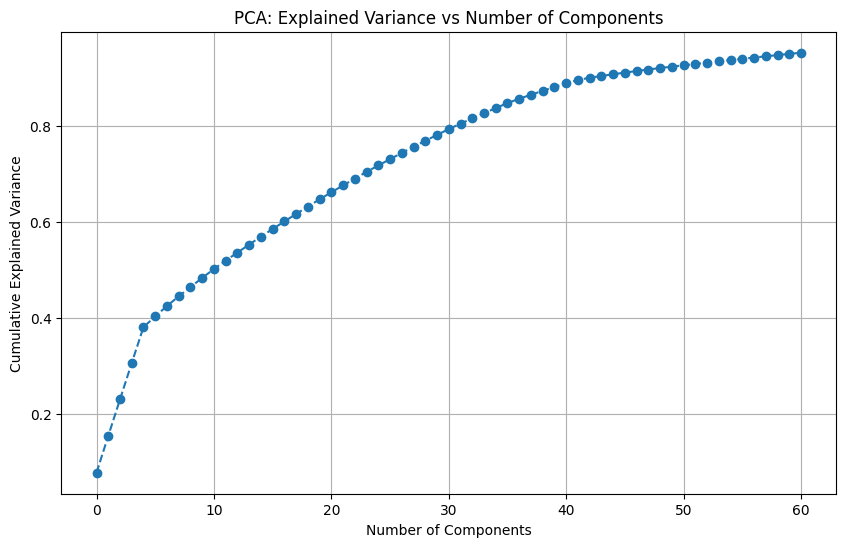

In [25]:
# 4. (Optional) Visualize the Variance (Scree Plot)
# This shows how much 'information' each new component holds
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs Number of Components')
plt.grid()
plt.show()

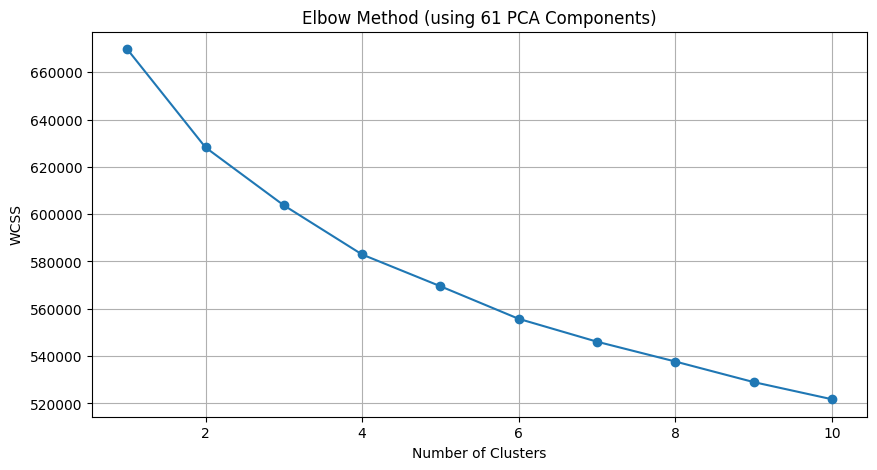

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
range_n_clusters = range(1, 11)

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca) # Training on 61 components
    wcss.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method (using 61 PCA Components)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [30]:
# 1. Initialize and Train K-Means
optimal_k = 6  # Based on your Elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# Train on the PCA data (X_pca), NOT the original data
cluster_labels = kmeans.fit_predict(X_pca)

# 2. Add the results back to your ORIGINAL DataFrame
# We do this so we can see who these people actually are (Age, Income),
# rather than just seeing math numbers.
df['Cluster_Labels'] = cluster_labels

print(f"Clustering complete. Customers divided into {optimal_k} groups.")

Clustering complete. Customers divided into 6 groups.


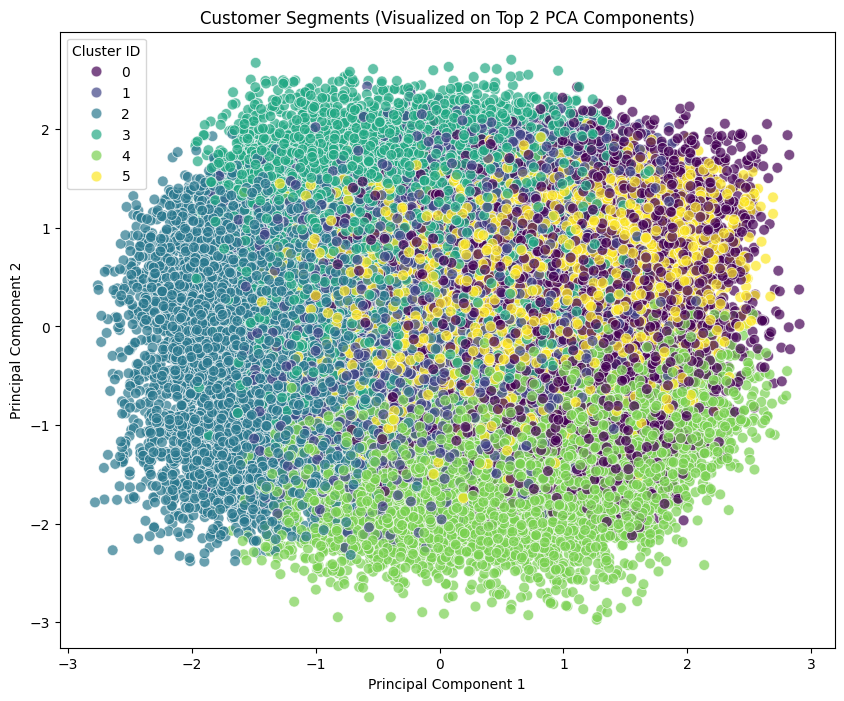

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 8))

# X-axis: 1st PCA Component, Y-axis: 2nd PCA Component
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=cluster_labels,
    palette='viridis',
    s=60,
    alpha=0.7 # Makes points slightly transparent to see overlaps
)

plt.title('Customer Segments (Visualized on Top 2 PCA Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster ID')
plt.show()

In [29]:
# Select the columns that make sense for business analysis
# (Ensure these columns exist in your 'df'. If you dropped them, reload 'df' from the CSV)
analysis_cols = ['Age', 'Income Level', 'Premium Amount', 'Recency', 'Coverage Amount']

# Calculate the average values for each cluster
cluster_profile = df.groupby('Cluster_Labels')[analysis_cols].mean()

# Add the count of customers in each cluster
cluster_profile['Customer_Count'] = df['Cluster_Labels'].value_counts()

print(cluster_profile)

                      Age   Income Level  Premium Amount      Recency  \
Cluster_Labels                                                          
0               43.989116  122011.155338     3015.728357  1054.049669   
1               43.692768   57297.539242     3047.619479   527.054498   
2               44.767475   60562.109571     3009.682698  1691.299916   

                Coverage Amount  Customer_Count  
Cluster_Labels                                   
0                 475092.538488           20214  
1                 496183.978068           16551  
2                 510137.913371           16738  


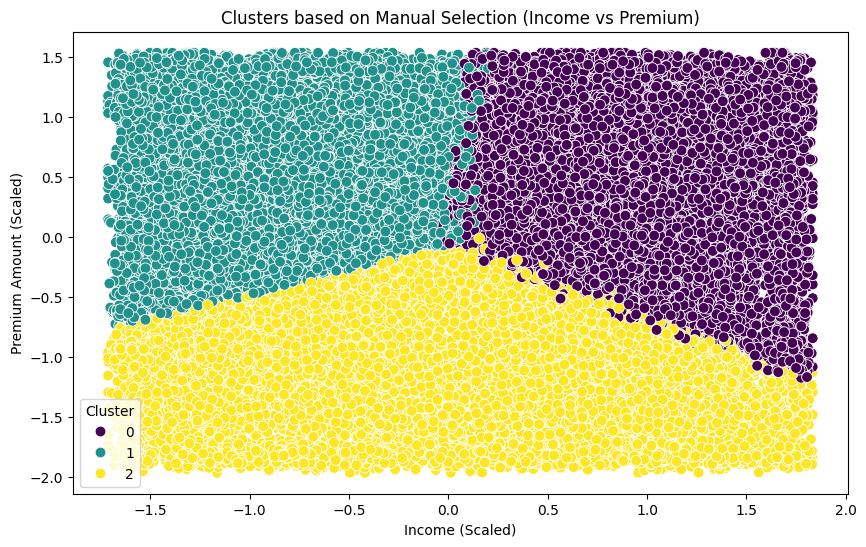

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load Data
df = pd.read_csv('/content/customer_segmentation_data.csv')

# 2. Manual Feature Selection (Pick only the Business-Critical columns)
# We ignore 'Gender', 'Location', etc. for now.
selected_features = ['Age', 'Income Level', 'Premium Amount', 'Coverage Amount']

# Create a new dataframe with just these columns
X_manual = df[selected_features]

# 3. Preprocessing (Scaling is still required!)
scaler = StandardScaler()
X_scaled_manual = scaler.fit_transform(X_manual)

# 4. Clustering (K-Means)
# Let's try K=3 again
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
manual_labels = kmeans.fit_predict(X_scaled_manual)

# 5. Visualization
# We don't need PCA! We can plot the actual features.
# Let's plot 'Income' vs 'Premium Amount' (The two most important money columns)
plt.figure(figsize=(10, 6))

# Note: X_scaled_manual is a numpy array.
# Col 1 = Income Level (Index 1 based on list above), Col 2 = Premium Amount (Index 2)
sns.scatterplot(
    x=X_scaled_manual[:, 1], # Income (Scaled)
    y=X_scaled_manual[:, 2], # Premium (Scaled)
    hue=manual_labels,
    palette='viridis',
    s=60
)

plt.title('Clusters based on Manual Selection (Income vs Premium)')
plt.xlabel('Income (Scaled)')
plt.ylabel('Premium Amount (Scaled)')
plt.legend(title='Cluster')
plt.show()

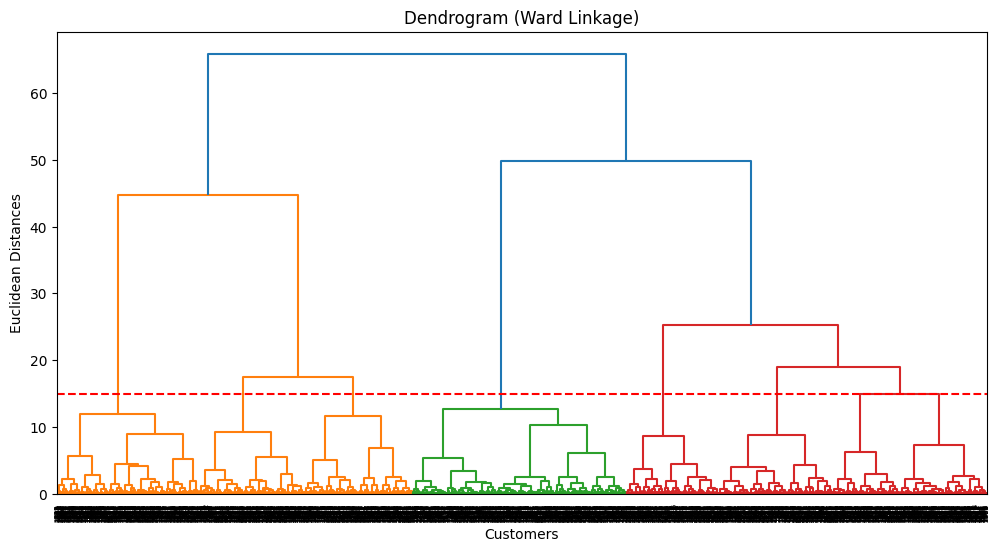

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# --- STEP A: Sampling ---
# Hierarchical clustering is too slow for 53k rows. We take a random sample of 3,000.
# This represents the population well without crashing memory.
df_sample = df.sample(n=3000, random_state=42)
X_sample = df_sample[['Income Level', 'Premium Amount']].values

# Scale the sample (Crucial!)
scaler = StandardScaler()
X_sample_scaled = scaler.fit_transform(X_sample)

# --- STEP B: Dendrogram ---
# This plot helps us decide the Number of Clusters (K)
plt.figure(figsize=(12, 6))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

# 'ward' minimizes the variance of the clusters being merged
dendrogram = sch.dendrogram(sch.linkage(X_sample_scaled, method='ward'))

plt.axhline(y=15, color='r', linestyle='--') # Adjust line based on visual cut
plt.show()

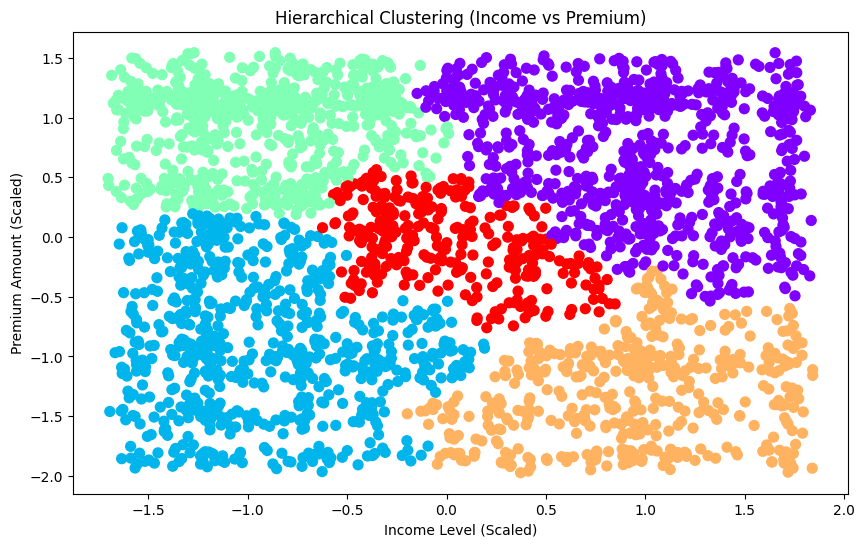

In [35]:
# --- STEP C: Apply the Model ---
# Let's assume the Dendrogram suggests K=5
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_sample_scaled)

# --- STEP D: Visualization ---
plt.figure(figsize=(10, 6))
plt.scatter(X_sample_scaled[:, 0], X_sample_scaled[:, 1], c=y_hc, cmap='rainbow', s=50)
plt.title('Hierarchical Clustering (Income vs Premium)')
plt.xlabel('Income Level (Scaled)')
plt.ylabel('Premium Amount (Scaled)')
plt.show()

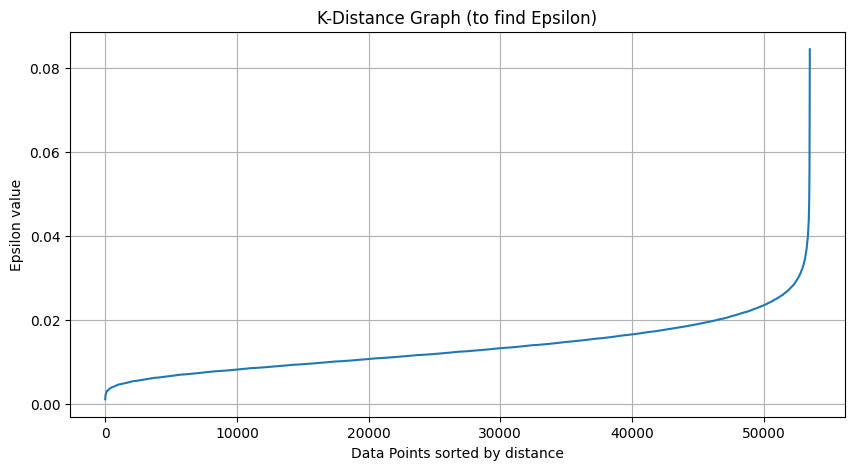

In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# We use the FULL dataset (or a large sample) for DBSCAN since it's faster than Hierarchical
X_money = df[['Income Level', 'Premium Amount']]
X_scaled_db = scaler.fit_transform(X_money)

# Calculate distance to the nearest n neighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled_db)
distances, indices = neighbors_fit.kneighbors(X_scaled_db)

# Sort and plot
distances = np.sort(distances[:, 3], axis=0) # 3rd neighbor
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('K-Distance Graph (to find Epsilon)')
plt.ylabel('Epsilon value')
plt.xlabel('Data Points sorted by distance')
plt.grid()
plt.show()

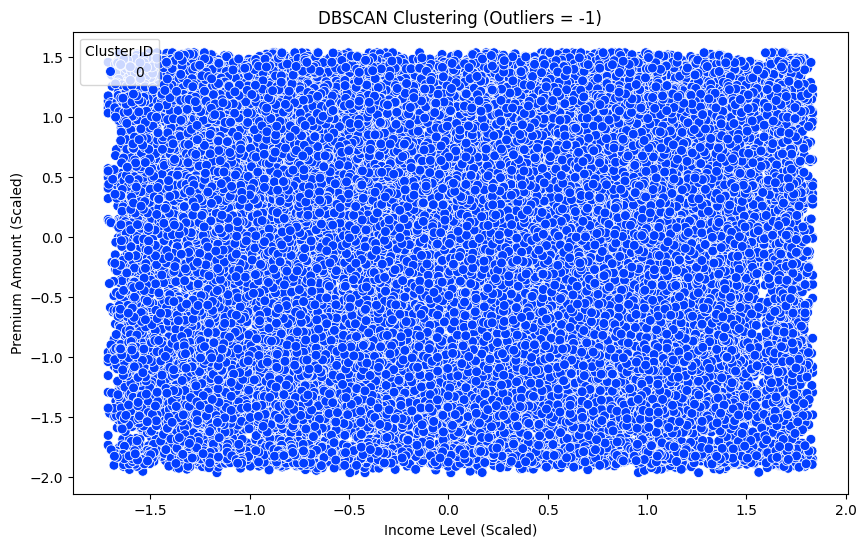

In [39]:
from sklearn.cluster import DBSCAN

# --- STEP A: Apply DBSCAN ---
# Adjust 'eps' based on your graph above!
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_db = dbscan.fit_predict(X_scaled_db)

# --- STEP B: Visualization ---
plt.figure(figsize=(10, 6))

# Plot the clusters
# Note: Cluster -1 contains the OUTLIERS (Noise)
sns.scatterplot(
    x=X_scaled_db[:, 0],
    y=X_scaled_db[:, 1],
    hue=y_db,
    palette='bright',
    s=50
)

plt.title('DBSCAN Clustering (Outliers = -1)')
plt.xlabel('Income Level (Scaled)')
plt.ylabel('Premium Amount (Scaled)')
plt.legend(title='Cluster ID')
plt.show()

In [38]:
import pandas as pd
# Assuming your labels are stored in 'y_db'
print(pd.Series(y_db).value_counts())

0    53503
Name: count, dtype: int64


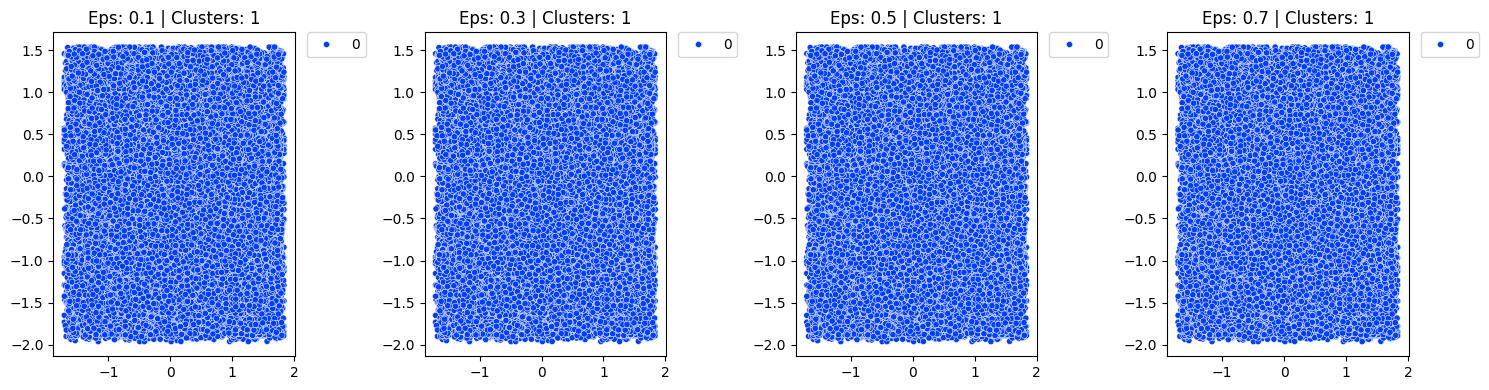

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Ensure Data is Scaled (CRITICAL)
# We use only 2 columns for clear visualization
X_money = df[['Income Level', 'Premium Amount']]
scaler = StandardScaler()
X_scaled_db = scaler.fit_transform(X_money)

# 2. Test Loop: Try different Eps values to see which one works
eps_values = [0.1, 0.3, 0.5, 0.7]

plt.figure(figsize=(15, 4))

for i, eps in enumerate(eps_values):
    # Run DBSCAN
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled_db)

    # Plot
    plt.subplot(1, 4, i+1)

    # We convert labels to string using .astype(str) so colors are distinct
    sns.scatterplot(x=X_scaled_db[:,0], y=X_scaled_db[:,1], hue=labels.astype(str), palette='bright', s=20)

    # Calculate how many clusters (ignoring noise -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    plt.title(f'Eps: {eps} | Clusters: {n_clusters}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

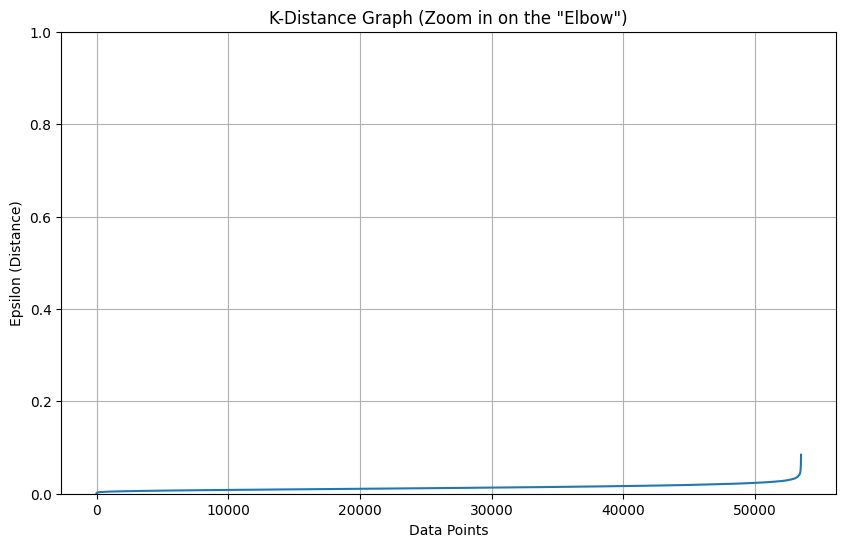

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
df = pd.read_csv("/content/customer_segmentation_data.csv")

In [4]:
features = [
    "Age",
    "Income Level",
    "Premium Amount",
    "Purchase History",
    "Behavioral Data",
    "Interactions with Customer Service"
]

In [5]:
data = df[features].copy()


In [6]:
data.head()

Age  Income Level  Premium Amount Purchase History Behavioral Data  \
0   23         70541            2749       04-10-2018         policy5   
1   26         54168            1966       11-06-2018         policy5   
2   29         73899            4413       06-05-2021         policy5   
3   20         63381            4342       09-02-2018         policy5   
4   25         38794            1276       09-10-2018         policy1   

  Interactions with Customer Service  
0                              Phone  
1                               Chat  
2                              Email  
3                               Chat  
4                               Chat

In [7]:
cat_cols = data.select_dtypes(include="object").columns

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

In [9]:
scaled

array([[-1.40198032, -0.33361745, -0.21363951, -1.27610312,  1.57133205,
         1.44984416],
       [-1.20303269, -0.78034795, -0.82258837, -0.11827025,  1.57133205,
        -1.29348327],
       [-1.00408506, -0.24199582,  1.08047401, -1.07451615,  1.57133205,
        -0.60765141],
       ...,
       [-1.26934857, -0.91431525,  1.07580774,  0.09882341, -0.65049515,
         0.07818045],
       [-0.14197867, -0.44930409,  1.13413617, -1.08485394,  0.83072299,
         0.07818045],
       [-1.60092795,  1.46964797,  1.14735728, -0.31813426, -0.65049515,
         1.44984416]])

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled)



In [24]:
dbscan = DBSCAN(eps=0.05, min_samples=20)
dbscan_labels = dbscan.fit_predict(scaled)

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate(name, labels, data):
    if len(set(labels)) <= 1:   # DBSCAN sometimes gives -1 only
        print(f"{name}: Not valid for silhouette (1 cluster only)")
        return

    sil = silhouette_score(data, labels)
    db = davies_bouldin_score(data, labels)

    print(f"\n{name} Results:")
    print(f"Silhouette Score: {sil:.4f}")
    print(f"Davies-Bouldin Score: {db:.4f}")

In [26]:
evaluate("KMeans", kmeans_labels, scaled)
evaluate("DBSCAN", dbscan_labels, scaled)


KMeans Results:
Silhouette Score: 0.1130
Davies-Bouldin Score: 2.2239
DBSCAN: Not valid for silhouette (1 cluster only)


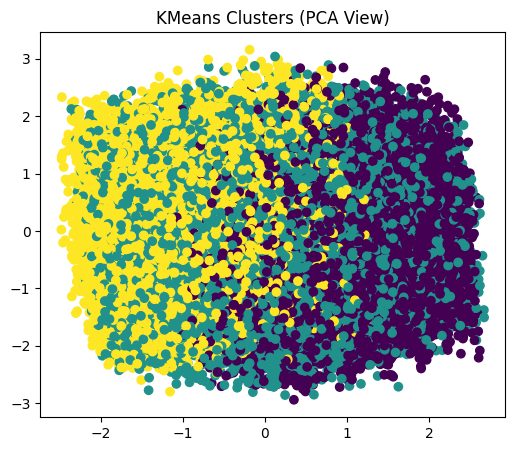

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap='viridis')
plt.title("KMeans Clusters (PCA View)")
plt.show()


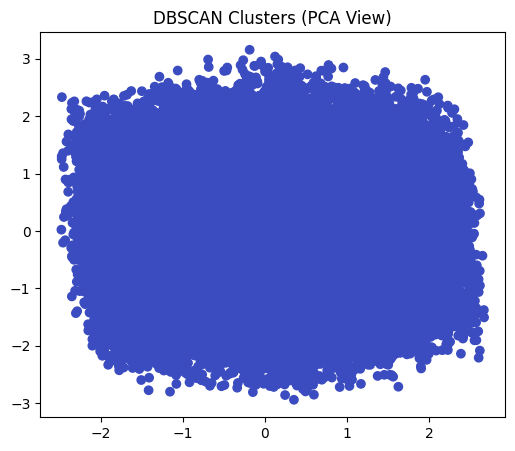

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels, cmap='coolwarm')
plt.title("DBSCAN Clusters (PCA View)")
plt.show()

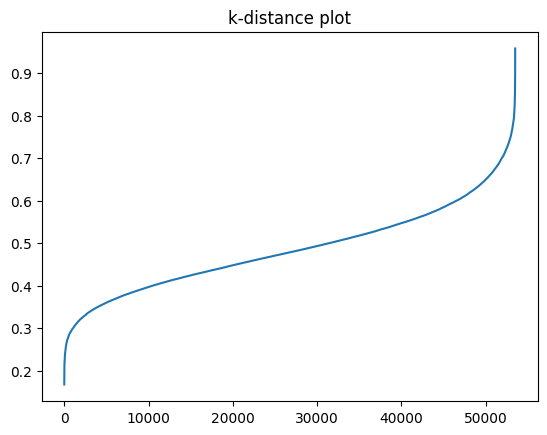

In [21]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(scaled)
distances, _ = nbrs.kneighbors(scaled)
distances = np.sort(distances[:,4])  # 4th nearest neighbor
plt.plot(distances)
plt.title("k-distance plot")
plt.show()


DBSCAN: Not valid for silhouette (all points in one cluster or only noise)


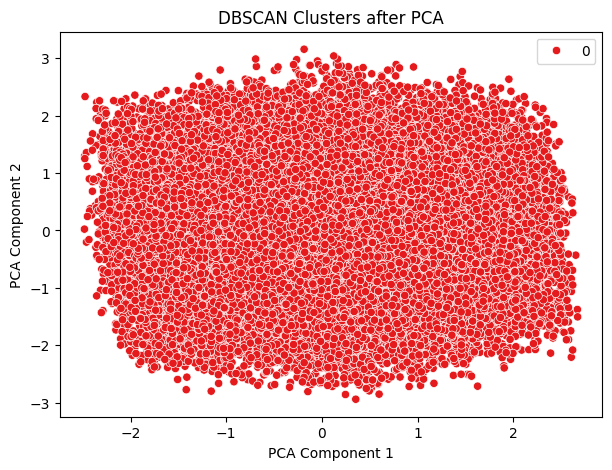

In [22]:
# ---------------------------------------------
# PCA + DBSCAN Clustering
# ---------------------------------------------
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' is your 6-feature dataframe already cleaned and encoded

# 1. Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 2. PCA to 2 components for DBSCAN
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 3. DBSCAN on PCA-reduced data
dbscan = DBSCAN(eps=0.5, min_samples=20)  # eps can be tuned
dbscan_labels = dbscan.fit_predict(pca_data)

# 4. Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    sil = silhouette_score(pca_data, dbscan_labels)
    db = davies_bouldin_score(pca_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {sil:.4f}")
    print(f"DBSCAN Davies-Bouldin Score: {db:.4f}")
else:
    print("DBSCAN: Not valid for silhouette (all points in one cluster or only noise)")

# 5. Plotting clusters
plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=dbscan_labels, palette="Set1", legend="full")
plt.title("DBSCAN Clusters after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


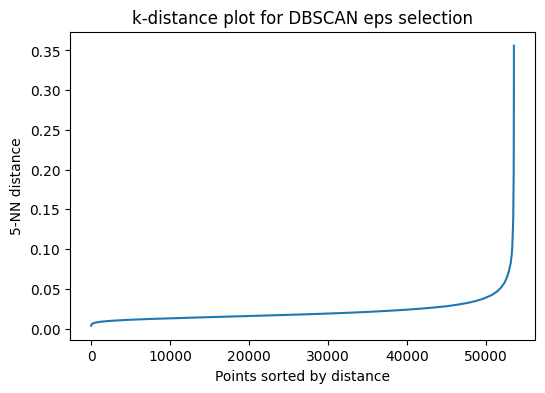

In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# pca_data = your 2D PCA-transformed data
neighbors = 5  # commonly min_samples
nbrs = NearestNeighbors(n_neighbors=neighbors).fit(pca_data)
distances, indices = nbrs.kneighbors(pca_data)

# take the distance to the 5th nearest neighbor
distances = np.sort(distances[:, neighbors-1])
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{neighbors}-NN distance")
plt.title("k-distance plot for DBSCAN eps selection")
plt.show()


In [1]:
# ---------------------------------------------
# DBSCAN after PCA with proper encoding
# ---------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
data = pd.read_csv("/content/customer_segmentation_data.csv")

# 2. Select 6 features (numeric + categorical)
features = [
    "Age",
    "Income Level",
    "Premium Amount",
    "Purchase History",
    "Behavioral Data",
    "Interactions with Customer Service"
]

X = data[features].copy()

# 3. Separate categorical and numeric
numeric_cols = ["Age", "Income Level", "Premium Amount"]
categorical_cols = ["Purchase History", "Behavioral Data", "Interactions with Customer Service"]

# 4. One-hot encode categorical features



In [2]:
ohe = OneHotEncoder(sparse_output=False)
X_cat = ohe.fit_transform(X[categorical_cols])
X_cat = pd.DataFrame(X_cat, columns=ohe.get_feature_names_out(categorical_cols))

# 5. Combine numeric + encoded categorical
X_num = X[numeric_cols].reset_index(drop=True)
X_processed = pd.concat([X_num, X_cat], axis=1)

# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)



In [ ]:
# 7. PCA to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 8. DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=20)  # eps can be tuned
labels = dbscan.fit_predict(X_pca)



In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")
if n_clusters > 1:
    sil = silhouette_score(X_pca, labels)
    db = davies_bouldin_score(X_pca, labels)
    print(f"Silhouette Score: {sil:.4f}")
    print(f"Davies-Bouldin Score: {db:.4f}")
else:
    print("DBSCAN: Not valid for silhouette (all points in one cluster or only noise)")

# 10. Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", legend="full")
plt.title("DBSCAN Clusters after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()